In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df=pd.read_excel(r'..\datasets\methods_data.xlsx')

In [3]:
df.head()

,Method 1,Method 2,Method 3,Method 4
0,51,82,79,85
1,85,91,84,80
2,55,92,74,65
3,48,80,98,71
4,70,52,63,67


In [4]:
m1=df['Method 1']
m2=df['Method 2']
m3=df['Method 3']
m4=df['Method 4']

In [5]:
df_melt = pd.melt(df, value_vars=list(df.columns))

In [6]:
df_melt.head()

,variable,value
0,Method 1,51
1,Method 1,85
2,Method 1,55
3,Method 1,48
4,Method 1,70


As it seems, we have more than 2 groups. That's why we can't use the t test. If the assumption of normality and homogeneity of variances is confirmed, we can use the one one way anova test.

# Normality test

Method 1


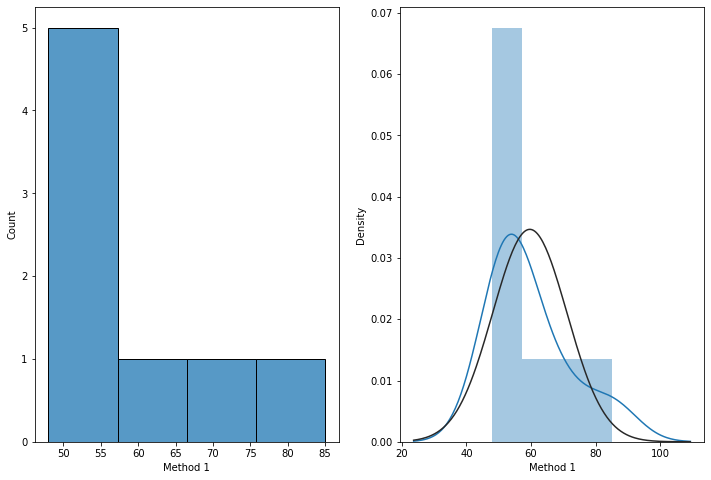

Method 2


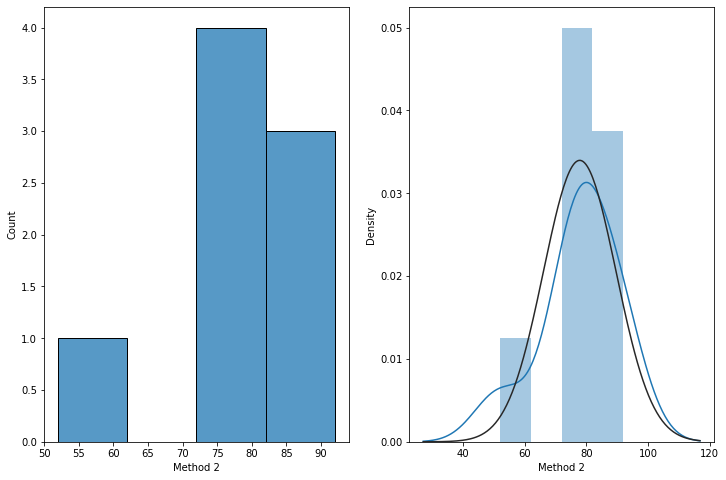

Method 3


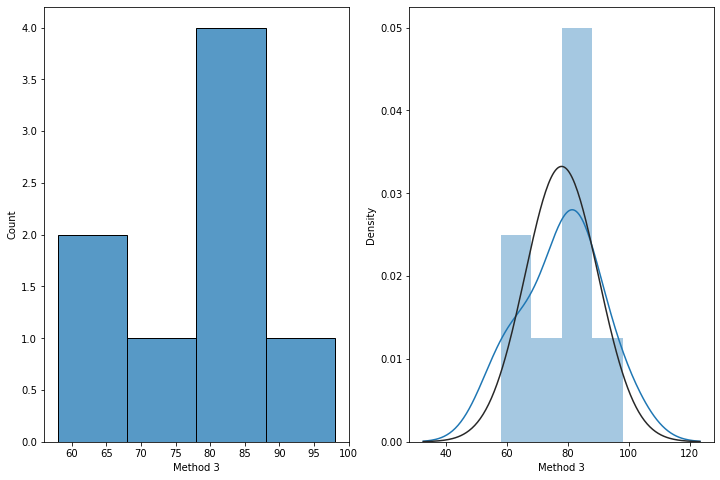

Method 4


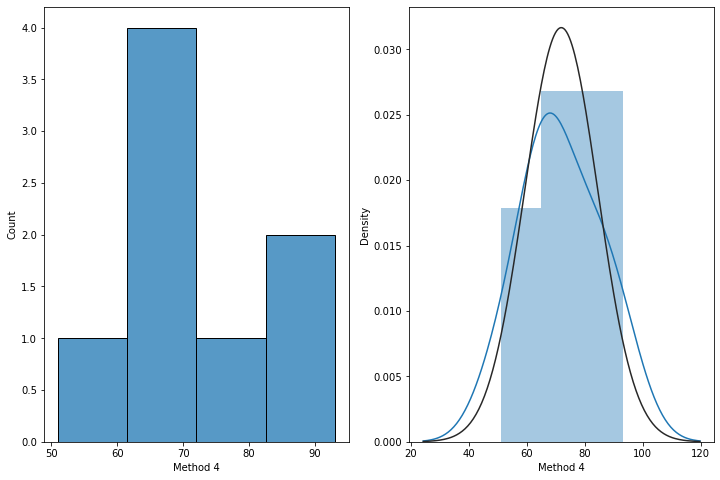

In [7]:
for col in df.columns:
    print(col)
    fig, axes=plt.subplots(figsize=(12, 8), nrows=1, ncols=2)
    sns.histplot(df[col], ax=axes[0])
    sns.distplot(df[col], ax=axes[1], fit=stats.norm)
    plt.show()

In [8]:
print(stats.shapiro(m1))
print(stats.shapiro(m2))
print(stats.shapiro(m3))
print(stats.shapiro(m4))

ShapiroResult(statistic=0.8409324288368225, pvalue=0.07700099796056747)
ShapiroResult(statistic=0.891330361366272, pvalue=0.2407812923192978)
ShapiroResult(statistic=0.9532430171966553, pvalue=0.743837296962738)
ShapiroResult(statistic=0.9762691259384155, pvalue=0.9421502947807312)


As can be seen, the p value of all 4 groups is greater than 0.05. Then we assume that all 4 groups have a normal distribution.

# Variance quality test

In [9]:
stat, p_value=stats.bartlett(m1, m2, m3, m4)
print(p_value)

0.9960538259856132


Since the p value is greater than 0.05, we assume that the variances are homogeneous.

Since both assumptions are released we can use the one way anova test

# One Way Anova test

H0: No significant difference between the mean of the groups                       
H1: The mean of at least one group differs from the others

In [10]:
fvalue, pvalue = stats.f_oneway(m1, m2, m3, m4)
print('%.3f'%pvalue)

0.025


H0 is rejected because p value is less than 0.05. That is, the mean of at least one group is different from the others.        
So, what is the difference in the average of which group or groups? How can we find this?                
For this we use a pairwise comparison test. So t test all combinations together

## Comparison test find different group

In [11]:
#Tukey test
tukey = pairwise_tukeyhsd(endog=df_melt['value'],
                          groups=df_melt['variable'],
                          alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Method 1 Method 2    18.25 0.0381   0.7796 35.7204   True
Method 1 Method 3   18.375 0.0365   0.9046 35.8454   True
Method 1 Method 4    12.25 0.2451  -5.2204 29.7204  False
Method 2 Method 3    0.125    1.0 -17.3454 17.5954  False
Method 2 Method 4     -6.0  0.785 -23.4704 11.4704  False
Method 3 Method 4   -6.125 0.7744 -23.5954 11.3454  False
---------------------------------------------------------


 Now, let's check the results. When we look at the p values, we see that only the average of Method 1 and Method 2 groups and Method 1 and Method 3 groups are not together.

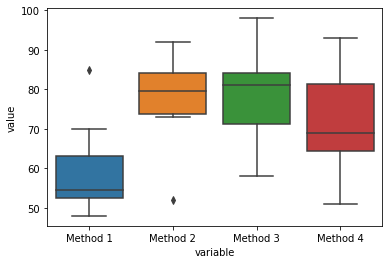

In [12]:
sns.boxplot(x='variable', y='value', data=df_melt)
plt.show()